In [86]:
import os
import json
import numpy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import calendar
import datetime
from IPython.display import Markdown, display, Javascript, display_html

def df_style(header=20, body=16, max_width=100):
    dfstyle = [dict(selector="th", props=[('font-size', f'{header}px')]),
               dict(selector="td", props=[('font-size', f'{body}px')]),
               dict(selector="td", props=[('text-align', 'center')]),
               dict(selector="th", props=[('text-align', 'center')]),
               dict(selector='th', props=[('max-width',f'{max_width}px;')])]
    return dfstyle

In [87]:
# ----- INPUTS HERE ----- #
building_name = 'Wildrose Residence'
f = open(f'detailed_output_yeg_ltc_wildrose_residence.json')
customer_name = 'JCI'

In [88]:
data = json.load(f)
file_name = os.path.splitext(f.name)[0]

<img src=https://res.cloudinary.com/crunchbase-production/image/upload/c_lpad,f_auto,q_auto:eco,dpr_1/htdkfr3co4n7wyxpslr0 alt="Drawing" style="width: 500px;" align="left"/>

In [89]:
display(Markdown(f"# Carbon Reduction Plan for {building_name}"))
display(Markdown(f"## Prepared for {customer_name}"))
display(Markdown(f"### {datetime.datetime.now().strftime('%B %Y')}"))
display(Markdown("***"))

# Carbon Reduction Plan for Wildrose Residence

## Prepared for JCI

### January 2023

***

### Building Summary

In [90]:
building_details=pd.DataFrame([data['base_building_state']['building_type'],
             data['base_building_state']['data_points']['gross_floor_area'],
             data['base_building_state']['data_points']['num_of_floors']],
            index=['Building Type','Floor Area (m²)','Number of Floors'],
            columns=[''])

display(building_details.T.style.set_table_styles(df_style(header=16, body=16, max_width=150)))

,Building Type,Floor Area (m²),Number of Floors
,Long-Term Care Home,3876,4


<br>

### Carbon Reduction Plan Inputs

In [91]:
df_options = pd.DataFrame.from_records(data['options'],index=[''])
df_options.columns = df_options.columns.str.replace("_"," ").str.title()

df1 = df_options.loc[:,df_options.columns.str.contains("Weight")].round(2)
df2 = df_options.loc[:,['Carbon Scenario','Net Present Value Discount Rate']]
df2.loc[:,'Carbon Scenario'] = df2.loc[:,'Carbon Scenario'].str.replace('_'," ").str.title()
df2.loc["",["2022 Carbon Price per Tonne","2030 Carbon Price per Tonne","2050 Carbon Price per Tonne"]] = [50,170,300]

df3 = pd.DataFrame([data['building_profiles'][0]['elec_rate'],
              data['building_profiles'][0]['gas_rate']],
             index=['Electricity Cost ($/kWh)','Natural Gas Cost ($/kWh)'],
            columns=[""]).T

### print dataframes side by side
space = "\xa0" * 5

df1_s = df1.style.set_table_attributes("style='display:inline'")
df2_s = df2.style.set_table_attributes("style='display:inline'")
df3_s = df3.style.set_table_attributes("style='display:inline'")

df1_mapper = {k: "{0:.2f}" for k in df1.columns}
df2_mapper = {k: "${0:.0f}" for k in ['2022 Carbon Price per Tonne','2030 Carbon Price per Tonne','2050 Carbon Price per Tonne']}
df2_mapper['Net Present Value Discount Rate'] = '{:,.0%}'
df3_mapper = {k: "{0:.4f}" for k in df3.columns}

display_html(df1_s.set_table_styles(df_style(header=16, body=16, max_width=75)).format(df1_mapper)._repr_html_()
             +space+df2_s.set_table_styles(df_style(header=16, body=16, max_width=75)).format(df2_mapper)._repr_html_()
             +space+df3_s.set_table_styles(df_style(header=16, body=16, max_width=100)).format(df3_mapper)._repr_html_(), raw=True)


Weight Abatement Cost 
 Weight Emission Saving 
 Weight Net Present Value 
 Weight Payback Years 
 
 
 
 
 
 0.00 
 0.65 
 0.35 
 0.00 
 
 
 
     
 
 
 
   
 Carbon Scenario 
 Net Present Value Discount Rate 
 2022 Carbon Price per Tonne 
 2030 Carbon Price per Tonne 
 2050 Carbon Price per Tonne 
 
 
 
 
 
 Current Policies 
 3% 
 $50 
 $170 
 $300 
 
 
 
     
 
 
 
   
 Electricity Cost ($/kWh) 
 Natural Gas Cost ($/kWh) 
 
 
 
 
 
 0.1900 
 0.0423

<br>

### Carbon Reduction Plan Summary

In [92]:
CRMs_df = pd.DataFrame.from_records(data['building_profiles'])

CRMs_df_all = CRMs_df.copy()
CRMs_df_all = pd.concat([CRMs_df_all.drop(['energy_model'], axis=1), CRMs_df_all['energy_model'].apply(pd.Series)], axis=1)
CRMs_df_all = CRMs_df_all.set_index(['year'])

incremental_cost = CRMs_df_all.loc[:,'incremental_cost'].sum()
abatement_cost_per_carbon = CRMs_df_all.loc[:,'abatement_cost'].mean()
actual_emission_saving = CRMs_df_all.loc[:,'actual_emission_saving'].sum()

df_metrics = pd.DataFrame([incremental_cost, abatement_cost_per_carbon, actual_emission_saving],
            index=['Total Incremental Cost','Average Abatement Cost per Tonne of Carbon Saved','Total Tonnes of Carbon Avoided'],
                         columns=['']).T

format_mapping={'Total Incremental Cost':'${:,.0f}' , 
                'Average Abatement Cost per Tonne of Carbon Saved':'${:,.2f}',
                'Total Tonnes of Carbon Avoided':'{:,.0f}'}

#teui & carbon totals
eui_2022=(CRMs_df_all.loc[2022,'total_elec_consumption'] + CRMs_df_all.loc[2022,'total_gas_consumption']).astype('int')
eui_2050=(CRMs_df_all.loc[2050,'total_elec_consumption'] + CRMs_df_all.loc[2050,'total_gas_consumption']).astype('int')

ghgs = CRMs_df_all.loc[:,['utilities_carbon_emission']]/1000
ghgs_2022=ghgs.loc[2022][0].astype('int')
ghgs_2050=ghgs.loc[2050][0].astype('int')

summary_df = pd.DataFrame([[ghgs_2022, ghgs_2050, f'{int((ghgs_2022-ghgs_2050)/ghgs_2022*100)}%'],
                           [eui_2022, eui_2050, f'{int((eui_2022-eui_2050)/eui_2022*100)}%']],
            index=['Carbon Emissions (Tonnes CO₂e)','Energy Use Intensity (kWh/m²)'],
            columns=['2022','2050','Savings']).T

#print dataframes side by side
space = "\xa0" * 15
df1_styler = df_metrics.style.set_table_attributes("style='display:inline'")
df2_styler = summary_df.style.set_table_attributes("style='display:inline'")

display_html(df1_styler.set_table_styles(df_style(header=16, body=16, max_width=150)).format(format_mapping)._repr_html_()+space+df2_styler.set_table_styles(df_style(header=16, body=16, max_width=150))._repr_html_(), raw=True)


Total Incremental Cost 
 Average Abatement Cost per Tonne of Carbon Saved 
 Total Tonnes of Carbon Avoided 
 
 
 
 
 
 $462,520 
 $9.46 
 150,990 
 
 
 
               
 
 
 
   
 Carbon Emissions (Tonnes CO₂e) 
 Energy Use Intensity (kWh/m²) 
 
 
 
 
 2022 
 277 
 304 
 
 
 2050 
 126 
 145 
 
 
 Savings 
 54% 
 52%

<br>

#### Yearly Carbon Reduction Measures

In [93]:
CRMs_df = CRMs_df.loc[:,['crm_name', 'year', 'like_for_like_cost', 'total_measure_cost',
       'incremental_cost', 'payback_years', 'net_present_value',
       'internal_rate_of_return', 'abatement_cost', 'actual_emission_saving','lifetime_operational_saving_mean']]

format_mapping={'like_for_like_cost'               : '${:,.0f}', 
                'total_measure_cost'               : '${:,.0f}',
                'incremental_cost'                 : '${:,.0f}',
                'payback_years'                    :  '{:,.1f}',
                'net_present_value'                : '${:,.0f}',
                'internal_rate_of_return'          :  '{:,.1%}',
                'abatement_cost'                   : '${:,.0f}',
                'actual_emission_saving'           :  '{:,.0f}',
                'lifetime_operational_saving_mean' : '${:,.0f}'}

for key, value in format_mapping.items():
    CRMs_df[key] = CRMs_df[key].apply(value.format)

CRMs_df = CRMs_df[CRMs_df['crm_name'] != "No Action"].round(1).tail(-1)
CRMs_df = CRMs_df.set_index(['crm_name'])

CRMs_df.columns = CRMs_df.columns.str.replace('total_measure_cost','Measure Cost')
CRMs_df.columns = CRMs_df.columns.str.replace('actual_emission_saving','Avg Emissions Savings')
CRMs_df.columns = CRMs_df.columns.str.replace('lifetime_operational_saving_mean','Avg Utility Savings')
CRMs_df.columns = CRMs_df.columns.str.replace("_"," ")

CRMs_df.columns = map(str.title, CRMs_df.columns)
CRMs_df.index   = map(str.title, CRMs_df.index)

start_year = data['building_profiles'][0]['year']
end_year   = 2050

#energy savings
elec_energy_savings = []
gas_energy_savings  = []
gross_floor_area    = data['base_building_state']['data_points']['gross_floor_area']

year = 1
while year <= (end_year - start_year):
    year_elec_savings = data['building_profiles'][year-1]['energy_model']['total_elec_consumption'] - data['building_profiles'][year]['energy_model']['total_elec_consumption']
    year_gas_savings  = data['building_profiles'][year-1]['energy_model']['total_gas_consumption'] - data['building_profiles'][year]['energy_model']['total_gas_consumption']
    
    if year_elec_savings != 0 or year_elec_savings != 0:
        elec_energy_savings.insert(year, round(year_elec_savings * gross_floor_area,-2))    
        gas_energy_savings.insert(year, round(year_gas_savings * gross_floor_area,-2))
    year += 1

CRMs_df['Elec kWh Savings'] = elec_energy_savings
CRMs_df['Elec kWh Savings'] = CRMs_df['Elec kWh Savings'].apply('{:,.0f}'.format)
CRMs_df['Gas kWh Savings']  = gas_energy_savings
CRMs_df['Gas kWh Savings'] = CRMs_df['Gas kWh Savings'].apply('{:,.0f}'.format)

display_html(CRMs_df)

,Year,Like For Like Cost,Measure Cost,Incremental Cost,Payback Years,Net Present Value,Internal Rate Of Return,Abatement Cost,Avg Emissions Savings,Avg Utility Savings,Elec kWh Savings,Gas kWh Savings
Reduce Air Infiltration With Pressure-Applied Atomized Sealant,2023,$0,"$20,000","$20,000",2.4,"$110,648",47.9%,$-220,"42,662","$8,464",-900,"131,600"
Increase Roof Insulation,2024,"$130,815","$155,040","$24,225",19.0,"$-1,565",2.4%,$18,"2,859","$1,273",100,"17,600"
Install Rooftop Pv,2025,$0,"$58,200","$58,200",5.3,"$140,009",21.0%,$-352,"17,818","$10,903","46,300",0
Install Led Lighting,2026,$0,"$77,520","$77,520",10.7,"$-8,674",0.5%,$84,"10,508","$7,238","38,900","-23,500"
Install Dcv Controls,2027,$0,"$15,750","$15,750",5.7,"$10,536",15.7%,$-116,"9,112","$2,780","-1,800","48,400"
Install Heat-Only Air Source Heat Pump,2028,"$58,800","$213,612","$154,812",135.2,"$-136,571",-11.1%,$924,"6,097","$1,145","-13,700","59,100"
Install Domestic Hot Water Air-Source Heat Pump,2029,"$19,320","$69,000","$49,680",6.7,"$43,265",13.0%,$-74,"34,343","$7,365","-66,000","318,200"
Install Advanced Glazing,2039,"$311,667","$374,000","$62,333",10.4,"$-1,249",2.6%,$9,"11,922","$5,983","6,600","53,200"


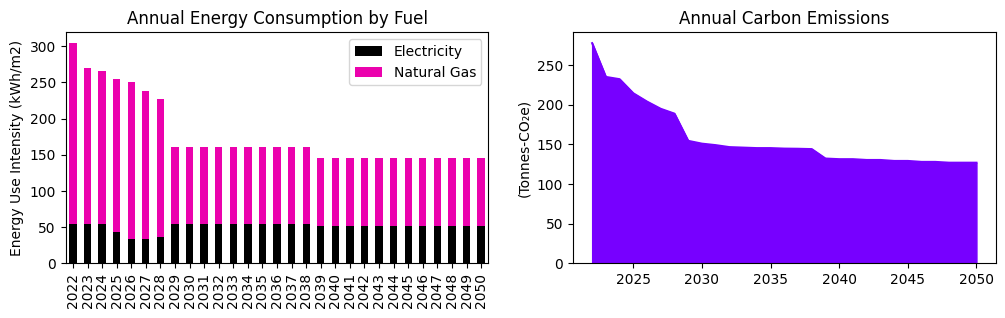

In [94]:
colours = ['#000000', '#eb02ad']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))

CRMs_df_all.loc[:,['total_elec_consumption','total_gas_consumption']].plot(
    kind='bar', 
    stacked=True,
    title='Annual Energy Consumption by Fuel',
    legend=True,
    ylabel='Energy Use Intensity (kWh/m2)',
    xlabel='',
    ax=axes[0],
    color=colours)

ghgs = CRMs_df_all.loc[:,['utilities_carbon_emission']]/1000
ghgs.plot(
    kind='area', 
    title='Annual Carbon Emissions',
    legend=False,
    ylabel='(Tonnes-CO₂e)',
    xlabel='',
    ax=axes[1],
    color='#7700ff')

axes[0].legend(["Electricity", "Natural Gas"]);

plt.show()

<br>

***

### Existing Building Performance

***

#### Monthly Breakdown by End Use & Fuel Type

In [95]:
#convert to data frame
df = pd.DataFrame.from_records(data['building_profiles'][0]['energy_model']['data'])
df = df.groupby(by = ['fuel_type','period','end_use'], ).sum(numeric_only=True).unstack()#.reset_index()

#split annual into monthly & drop annual
for col_idx, col in df.items():
    for fuel in ['electricity','natural_gas']:
        d = col.loc[fuel]
        if d.loc['annual'] > 0:
            d.loc[[1,2,3,4,5,6,7,8,9,10,11,12]] = d.loc['annual']/12

df = df.drop(['annual'],level=1)
df = df.droplevel(level=0,axis=1)

#match period values to month names
idx = pd.Series(df.index.get_level_values(1))
idx = idx.apply(lambda x: calendar.month_name[x])
df.index = pd.MultiIndex.from_arrays([df.index.get_level_values(level=0), idx])

#combine heating & cooling
df['Heating'] = df['oa_heating'] + df['skin_heating']
df = df.drop(['oa_heating','skin_heating'],axis=1)
if 'oa_cooling' in df.columns:
    df['Cooling'] = df['oa_cooling'] + df['skin_cooling']
    df = df.drop(['oa_cooling','skin_cooling'],axis=1)
else:
    df['Cooling'] = df['skin_cooling']
    df = df.drop(['skin_cooling'],axis=1)

#rename columns
mapper = {'dhw':'DHW',
         'fans':'Fans',
         'lighting':'Lights',
         'plugload':'Plugs',
         'pumps':'Pumps',
         'renewable':'Renewable',
         'process':'Process'}
df = df.rename(columns=mapper)

#reorder columns for graph
if 'process' in df.columns:
    df = df[['Lights','Plugs','Pumps','Fans','DHW','Heating','Cooling','Process']]
else:
    df = df[['Lights','Plugs','Pumps','Fans','DHW','Heating','Cooling']]

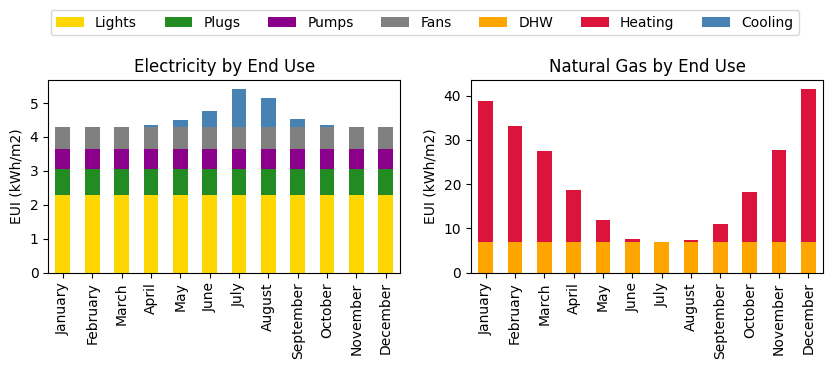

In [96]:
#monthly bar charts

colours = ['gold', 'forestgreen', 'darkmagenta', 'grey', 'orange', 'crimson', 'steelblue','darkgrey']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,2.5))
df.loc['electricity'].plot(
    kind='bar', 
    stacked=True,
    title='Electricity by End Use',
    legend=False,
    ylabel='EUI (kWh/m2)',
    xlabel='',
    ax=axes[0],
    color=colours)

df.loc['natural_gas'].plot(
    kind='bar', 
    stacked=True, 
    title='Natural Gas by End Use',
    legend='left',
    ylabel='EUI (kWh/m2)',
    xlabel='',
    ax=axes[1],
    color=colours)

plt.legend(ncol=len(df.columns), bbox_to_anchor=(0.95, 1.4))
plt.show()

#### Annual Breakdown by Fuel Type

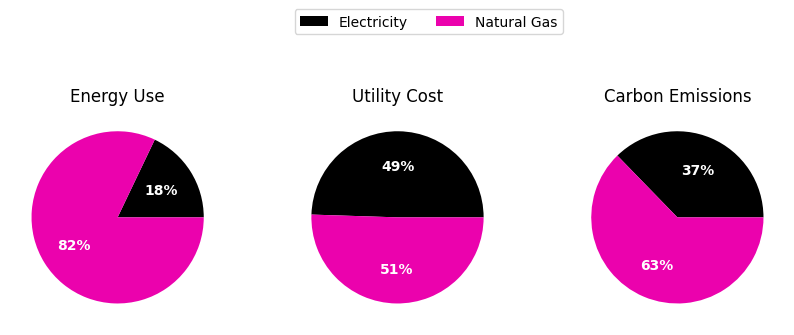

In [97]:
#annual pie charts

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,4))

colours = ['#000000', '#eb02ad']
elec = df.loc['electricity'].sum().sum()
gas  = df.loc['natural_gas'].sum().sum()
axes[0].pie([elec, gas], colors=colours, autopct='%0.0f%%', textprops={'color':"w", 'weight':'bold'})
axes[0].set_title('Energy Use')

elec2 = df.loc['electricity'].sum().sum() * data['building_profiles'][0]['elec_rate']
gas2  = df.loc['natural_gas'].sum().sum() * data['building_profiles'][0]['gas_rate']
axes[1].pie([elec2, gas2], colors=colours, autopct='%0.0f%%', textprops={'color':"w", 'weight':'bold'})
axes[1].set_title('Utility Cost')

gas3  = df.loc['natural_gas'].sum().sum() * 0.18 * data['base_building_state']['data_points']['gross_floor_area']
elec3 = data['building_profiles'][0]['utilities_carbon_emission'] - gas3
axes[2].pie([elec3, gas3], colors=colours, autopct='%0.0f%%', textprops={'color':"w", 'weight':'bold'})
axes[2].set_title('Carbon Emissions')

plt.legend(['Electricity', 'Natural Gas'],ncol=len(df.columns), bbox_to_anchor=(0.0, 1.5))
plt.subplots_adjust(wspace=0.3)
plt.show()

#### Annual Breakdown by End Use

In [98]:
#annual sankey charts

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as offline
offline.init_notebook_mode(connected=True)

labels = ['Electricity', 'Natural Gas']
labels.extend(list(df.columns.values))
colours = ['#000000','#eb02ad']
colours.extend(['gold', 'forestgreen', 'darkmagenta', 'grey', 'orange', 'crimson', 'steelblue','darkgrey'])

sources = [0,0,0,0,0,0,0,1,1,1,1,1,1,1]
targets = [2,3,4,5,6,7,8,2,3,4,5,6,7,8]

#energy
elec_energy_values = df.loc['electricity'].sum()
gas_energy_values  = df.loc['natural_gas'].sum()
energy_values = []
energy_values.extend(elec_energy_values)
energy_values.extend(gas_energy_values)

#cost
elec_cost_values = elec_energy_values * data['building_profiles'][0]['elec_rate']
gas_cost_values  = gas_energy_values  * data['building_profiles'][0]['gas_rate']
cost_values = []
cost_values.extend(elec_cost_values)
cost_values.extend(gas_cost_values)

#carbon
elec_carbon_values = elec_energy_values * (elec3/(elec*data['base_building_state']['data_points']['gross_floor_area']))
gas_carbon_values  = gas_energy_values * 0.18
carbon_values = []
carbon_values.extend(elec_carbon_values)
carbon_values.extend(gas_carbon_values)

sankey_data = [go.Sankey(node = dict(pad=15, thickness=20, line=dict(width=0.0), label=labels, color=colours),
                  link = dict(source = sources,target = targets,value  = energy_values,color  = "lightgrey"),visible=True),
        go.Sankey(node = dict(pad=15, thickness=20, line=dict(width=0.0), label=labels, color=colours),
                  link = dict(source = sources,target = targets,value  = cost_values,color  = "lightgrey"),visible=False),
        go.Sankey(node = dict(pad=15, thickness=20, line=dict(width=0.0), label=labels, color=colours),
                  link = dict(source = sources,target = targets,value  = carbon_values,color  = "lightgrey"),visible=False)]

updatemenus = [dict(type='buttons',buttons=
            [dict(label='Energy'   ,method='update',args=[{'visible': [True, False, False]},{'title': 'Energy by End Use'}]),
             dict(label='Cost'     ,method='update',args=[{'visible': [False, True, False]},{'title': 'Cost by End Use'}]),
             dict(label='Emissions',method='update',args=[{'visible': [False, False, True]},{'title': 'Emissions by End Use'}])]
             )]

layout = go.Layout(updatemenus=updatemenus, title = dict(text='Energy by End Use',font=dict(color='black',size=20)), font = dict(size = 10))
fig    = go.Figure(data=sankey_data, layout=layout)
fig.update_layout(width=800,height=500)
offline.iplot(fig)

***

### Annual Cashflow

***

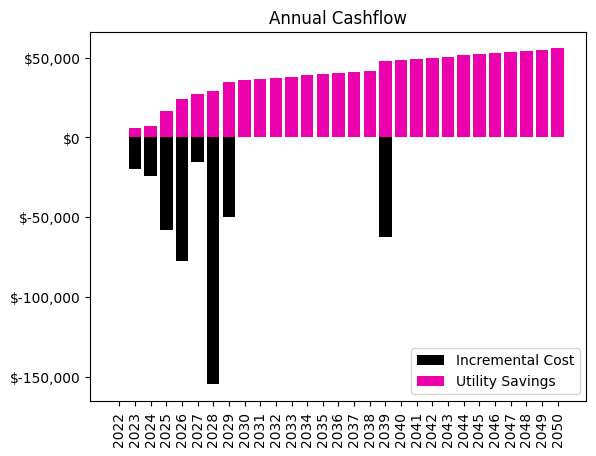

In [99]:
#annual cashflow chart

start_year = data['building_profiles'][0]['year']
end_year   = 2050

incremental_cost    = []
elec_energy_savings = [0]
gas_energy_savings  = [0]
utility_savings     = [0]
gross_floor_area    = data['base_building_state']['data_points']['gross_floor_area']

year = 0
while year <= (end_year - start_year):
    incremental_cost.insert(year, -data['building_profiles'][year]['incremental_cost'])
    if year > 0:
        elec_energy_savings.insert(year, data['building_profiles'][year-1]['energy_model']['total_elec_consumption'] - data['building_profiles'][year]['energy_model']['total_elec_consumption'])
        elec_energy_savings[year] += elec_energy_savings[year-1]
        gas_energy_savings.insert(year, data['building_profiles'][year-1]['energy_model']['total_gas_consumption'] - data['building_profiles'][year]['energy_model']['total_gas_consumption'])
        gas_energy_savings[year]  += gas_energy_savings[year-1]
        utility_savings.insert(year, (elec_energy_savings[year] * data['building_profiles'][year]['elec_rate'] + gas_energy_savings[year] * data['building_profiles'][year]['gas_rate']) * gross_floor_area)
    year += 1

fig, ax = plt.subplots()
ax.set_xticks(range(len(incremental_cost)))
ax.set_xticklabels([str(i) for i in range(start_year, end_year+1)], rotation=90)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '${:,.0f}'.format(x)))
#ax.axhline(y=0, color='black', linewidth=1)

ax.bar(range(len(incremental_cost)), incremental_cost, color='#000000', label='Incremental Cost')
ax.bar(range(len(utility_savings)), utility_savings, color='#eb02ad', label='Utility Savings')

ax.legend()
plt.title('Annual Cashflow')
plt.show()

***

### Equipment Summary

***

In [100]:
#convert to data frame
df = pd.DataFrame.from_records(data['base_building_state']['equipment_list'])
df = df.drop(['equipment_config'],axis=1)
for name in df['name']:
    if name == 'boiler':
        df = df.replace([name], 'gas-fired boiler')
    if name == 'dhw_heater':
        df = df.replace([name], 'dhw heater')
    if name == 'terminal_unit':
        df = df.replace([name], 'gas-fired furnance with ac')

df = pd.concat([df.drop(['properties'], axis=1), df['properties'].apply(pd.Series)], axis=1)

df.loc[:,'combined system size (heating tons)'] = df.loc[:,'system_size'].fillna(0) + df.loc[:,'system_size_heating_primary'].fillna(0) + df.loc[:,'system_size_heating_secondary'].fillna(0)
df = df.rename(columns={'system_size_cooling':'combined system size (cooling tons)'})
df[df.columns[df.columns.str.contains('size')]] = df.loc[:,df.columns.str.contains('size')].fillna(0).astype(int)

for col in  ['system_size','system_type','system_size_heating_primary','system_size_heating_secondary','energy_density']:
    if col in df.columns:
        df = df.drop([col],axis=1)

df = df.drop(['present'],axis=1)

df = df.set_index('name')
df.index.names = ['equipment']
df.columns = df.columns.str.replace("_"," ")

df.columns = map(str.title, df.columns)
df.index = map(str.title, df.index)
df = df.rename(index={'Dhw Heater':'DHW Heater','Mua':'MUA','Gas-Fired Furnance With Ac':'Gas-Fired Furnance With AC'})

if 'Clothes_Dryer' in df.index:
    df = df.drop(['Clothes_Dryer'])

display(df)

,Installation Year,Combined System Size (Cooling Tons),Combined System Size (Heating Tons)
Gas-Fired Boiler,1999,0,140
DHW Heater,2019,0,46
MUA,1999,0,26
Gas-Fired Furnance With AC,1999,20,94


In [102]:
!jupyter nbconvert --to html --no-input --output {file_name}.html mop_results_reviewer.ipynb

[NbConvertApp] Converting notebook mop_results_reviewer.ipynb to html
[NbConvertApp] Writing 766067 bytes to detailed_output_yeg_ltc_wildrose_residence.html
